<a href="https://colab.research.google.com/github/souravkarma/Invisible-Hand-Stock-Market-Prediction/blob/main/Stock_Market_Prediction_2_Using_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROCESS

1. COLLECT STOCK DATA
2. PRE-PROCESS THE DATA--TRAIN/TEST
3. CREATE STACKED LSTM MODEL
4. PRACTICE TEST DATA AND PLOT OUTPUT
5. PREDICT FUTURE 30 DAYS DATA

In [1]:
!pip install yfinance


In [7]:
!pip install tensorflow

In [8]:
!pip install keras

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import yfinance as yf
import math
import numpy as np
import pandas as pd
import pandas_datareader as web
#from sklearn.tree import DecisionTreeRegressor
#from sklearn.linear_model import LinearRegression
#from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [10]:
## LSTM ARE SENSATIVE TO SCALE OF DATA , SO WE USE MINMAXSCALER TO TRANSFORM DATA FROM 0 TO 1.(STANDARDIZATION)

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import yfinance as yf
import math

def predict_stock_ann(input_stock_name):
    data = yf.download(input_stock_name, start='2008-01-01', end='2024-03-01', interval='1d')
    data.to_csv(f'{input_stock_name}.csv')
    df = pd.read_csv(f'{input_stock_name}.csv').reset_index()
    data = df.filter(['Close'])

    # Convert to np array
    dataset = data.values

    # Get the number of rows to train the model on
    training_data_len = math.ceil(len(dataset) * 0.8)

    # Scale the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(dataset)

    # Create training dataset
    train_data = scaled_data[0:training_data_len, :]

    # Split the data into x_train and y_train data set
    x_train = []
    y_train = []

    for i in range(60, len(train_data)):
        x_train.append(train_data[i-60:i, 0])
        y_train.append(train_data[i, 0])

    x_train, y_train = np.array(x_train), np.array(y_train)

    # Build ANN model
    model = Sequential([
        Flatten(input_shape=(x_train.shape[1],)),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(1)
    ])

    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(x_train, y_train, batch_size=1, epochs=3)

    # Create the test data set
    test_data = scaled_data[training_data_len-60:, :]

    x_test = []
    y_test = dataset[training_data_len:, :]

    for i in range(60, len(test_data)):
        x_test.append(test_data[i-60:i, 0])

    x_test = np.array(x_test)

    predictions = model.predict(x_test)
    predictions = scaler.inverse_transform(predictions)

    # Evaluate the model on the test set
    loss = model.evaluate(x_test, y_test)
    # Calculate Mean Absolute Error (MAE)
    mae = mean_absolute_error(y_test, predictions)
    mae1=f'Mean Absolute Error: {mae}'

    #Get root mean squared error(RMSE)

    rmse =np.sqrt(np.mean(predictions-y_test)**2)
    rmse1=f'root_mean_squared_error {rmse}'

    # Calculate R-squared (R2) score
    r2 = r2_score(y_test, predictions)
    r=f'R-squared (R2) Score: {r2}'

    #plt.style.use('fivethirtyeight')
    plt.style.use('dark_background')
    #plot the data

    train=data[:training_data_len]
    valid=data[training_data_len:]
    valid['predictions'] = predictions

    #Visualize the data
    plt.figure(figsize=(16,8))
    plt.title('Model prediciton results - Reliance shares')

    plt.ylabel('Close Price', fontsize=18)
    plt.plot(train['Close'] , color='red')
    plt.plot(valid['Close'] , color='yellow')
    plt.plot(valid[ 'predictions'] , color='green')
    plt.legend(['Train','Validation', 'predictions'], loc='lower right')
    plt.savefig('/content/prediction.png')
    plt.close

    return '/content/prediction.png',predictions,mae1,rmse1,r

[*********************100%%**********************]  1 of 1 completed

Epoch 1/3


3128/3128 [==============================] - 7s 2ms/step - loss: 8.1105e-04
Epoch 2/3
3128/3128 [==============================] - 6s 2ms/step - loss: 4.7946e-04
Epoch 3/3
25/25 [==============================] - 0s 2ms/step - loss: 106988.7891


<ipython-input-24-76336707d8ad>:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['predictions'] = predictions


('/content/prediction.png',
 array([[205.1921 ],
        [209.01936],
        [210.29578],
        [211.46631],
        [213.17653],
        [213.21675],
        [214.52945],
        [213.391  ],
        [211.30002],
        [211.5574 ],
        [211.09154],
        [210.78438],
        [211.2154 ],
        [211.74771],
        [212.05614],
        [212.28041],
        [213.70216],
        [212.88887],
        [211.83563],
        [209.5709 ],
        [208.35922],
        [206.65053],
        [206.14749],
        [209.21642],
        [211.1615 ],
        [213.22873],
        [214.73138],
        [216.72678],
        [217.85089],
        [217.93832],
        [216.17625],
        [214.0319 ],
        [213.67674],
        [212.30975],
        [209.76732],
        [212.46346],
        [214.17892],
        [213.92905],
        [217.91626],
        [223.13617],
        [224.889  ],
        [225.00261],
        [226.82013],
        [228.29295],
        [225.7667 ],
        [223.1095 ],
      

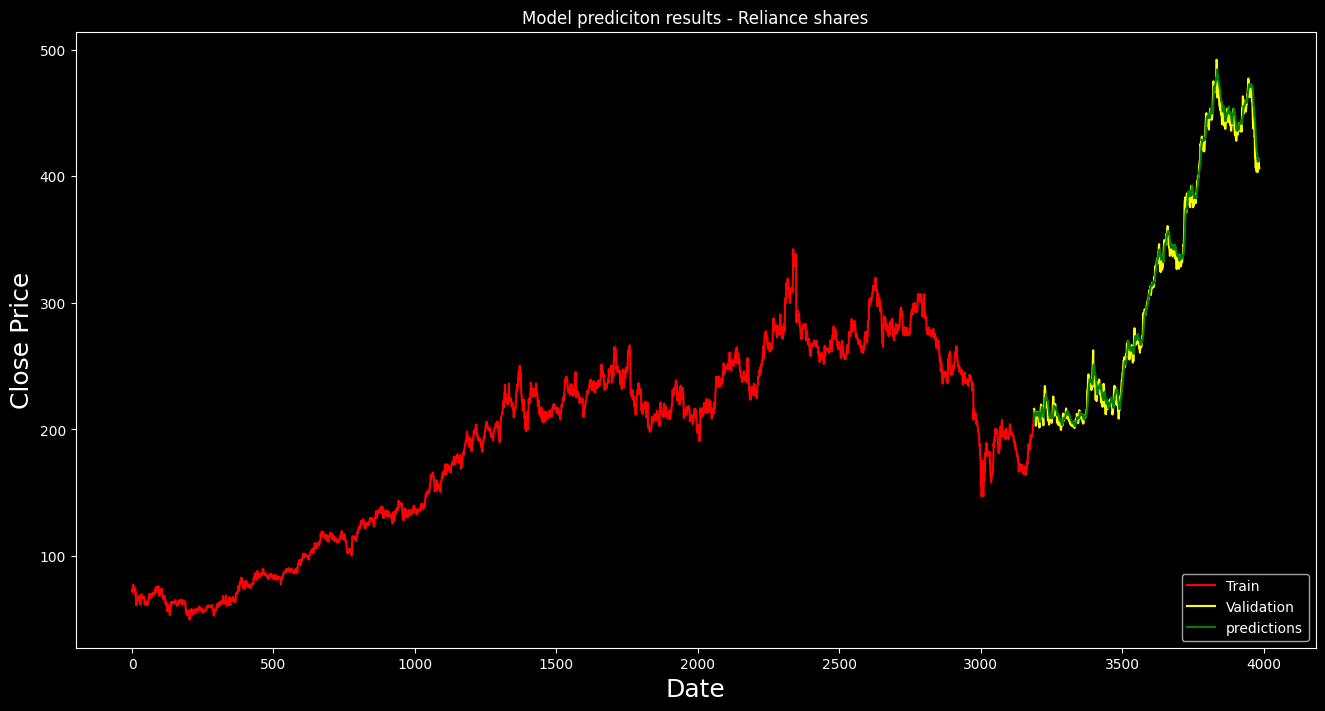

In [25]:
predict_stock_ann('ITC.NS')

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import yfinance as yf
import math

def predict_stock_cnn(input_stock_name):
    data = yf.download(input_stock_name, start='2008-01-01', end='2024-03-01', interval='1d')
    data.to_csv(f'{input_stock_name}.csv')
    df = pd.read_csv(f'{input_stock_name}.csv').reset_index()
    data = df.filter(['Close'])

    # Convert to np array
    dataset = data.values

    # Get the number of rows to train the model on
    training_data_len = math.ceil(len(dataset) * 0.8)

    # Scale the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(dataset)

    # Create training dataset
    train_data = scaled_data[0:training_data_len, :]

    # Split the data into x_train and y_train data set
    x_train = []
    y_train = []

    for i in range(60, len(train_data)):
        x_train.append(train_data[i-60:i, 0])
        y_train.append(train_data[i, 0])

    x_train, y_train = np.array(x_train), np.array(y_train)

    # Reshape data for CNN
    x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))

    # Build CNN model
    model = Sequential([
        Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(x_train.shape[1], 1)),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(50, activation='relu'),
        Dense(1)
    ])

    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(x_train, y_train, batch_size=1, epochs=3)

    # Create the test data set
    test_data = scaled_data[training_data_len-60:, :]

    x_test = []
    y_test = dataset[training_data_len:, :]

    for i in range(60, len(test_data)):
        x_test.append(test_data[i-60:i, 0])

    x_test = np.array(x_test)
    x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

    predictions = model.predict(x_test)
    predictions = scaler.inverse_transform(predictions)

    # Evaluate the model on the test set
    loss = model.evaluate(x_test, y_test)
    # Calculate Mean Absolute Error (MAE)
    mae = mean_absolute_error(y_test, predictions)
    mae1=f'Mean Absolute Error: {mae}'

    #Get root mean squared error(RMSE)

    rmse =np.sqrt(np.mean(predictions-y_test)**2)
    rmse1=f'root_mean_squared_error {rmse}'

    # Calculate R-squared (R2) score
    r2 = r2_score(y_test, predictions)
    r=f'R-squared (R2) Score: {r2}'

    #plt.style.use('fivethirtyeight')
    plt.style.use('dark_background')
    #plot the data

    train=data[:training_data_len]
    valid=data[training_data_len:]
    valid['predictions'] = predictions

    #Visualize the data
    plt.figure(figsize=(16,8))
    plt.title('Model prediciton results - Reliance shares')

    plt.ylabel('Close Price', fontsize=18)
    plt.plot(train['Close'] , color='red')
    plt.plot(valid['Close'] , color='yellow')
    plt.plot(valid[ 'predictions'] , color='green')
    plt.legend(['Train','Validation', 'predictions'], loc='lower right')
    plt.savefig('/content/prediction.png')
    plt.close

    return '/content/prediction.png',predictions,mae1,rmse1,r

[*********************100%%**********************]  1 of 1 completed

Epoch 1/3


3128/3128 [==============================] - 9s 3ms/step - loss: 9.1823e-04
Epoch 2/3
3128/3128 [==============================] - 9s 3ms/step - loss: 5.1122e-04
Epoch 3/3
25/25 [==============================] - 0s 3ms/step - loss: 107004.7266


<ipython-input-26-7bd497d62338>:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['predictions'] = predictions


('/content/prediction.png',
 array([[203.70222],
        [205.96365],
        [208.85056],
        [211.20085],
        [213.25204],
        [214.4606 ],
        [215.62679],
        [216.34097],
        [217.133  ],
        [215.16075],
        [214.96286],
        [214.26982],
        [214.65819],
        [214.53912],
        [214.93677],
        [214.97379],
        [215.37244],
        [215.9682 ],
        [216.39822],
        [216.2728 ],
        [214.84625],
        [213.54674],
        [212.2431 ],
        [212.20554],
        [212.51051],
        [213.7106 ],
        [215.12683],
        [216.83234],
        [218.00056],
        [219.27734],
        [219.74599],
        [219.61903],
        [218.73355],
        [217.96162],
        [217.24864],
        [216.17783],
        [215.92603],
        [216.85677],
        [217.58078],
        [220.48225],
        [223.42006],
        [226.08636],
        [227.47163],
        [227.94316],
        [228.22285],
        [228.4861 ],
      

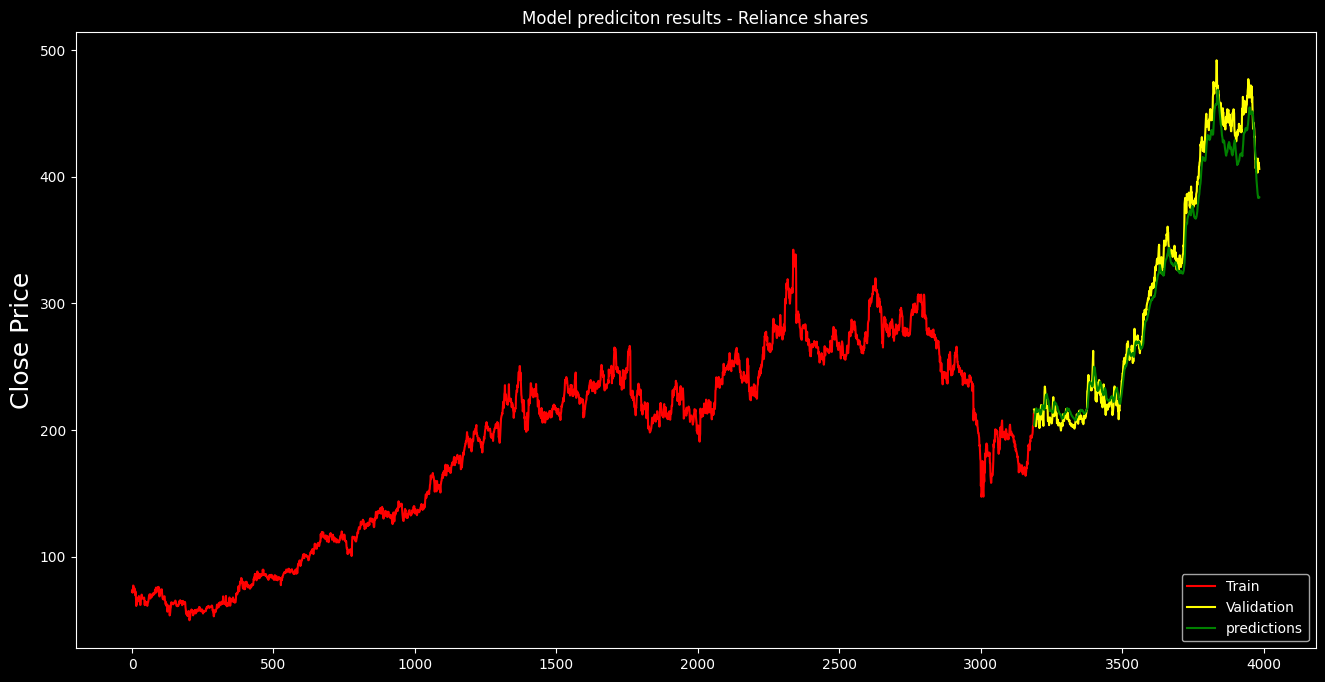

In [27]:
predict_stock_cnn('ITC.NS')

In [30]:
def predict_stock_lstm(input_stock_name):
  data=yf.download([str(input_stock_name)],start='2008-01-01',end='2024-03-01',interval='1D')

  data=data.filter(['Close'])

  #Convert to np array
  dataset=data.values

  #Get the number of rows to train the model on
  #math.ceil to round up

  training_data_len = math.ceil(len(dataset)*.8)
  #Scale the data

  scaler = MinMaxScaler(feature_range=(0,1))
  scaled_data = scaler.fit_transform(dataset)
  #Create training dataset
#Create scaled training dataset

  train_data = scaled_data[0:training_data_len,:]

#Split the data into x_train and y_train data set

  x_train=[]
  y_train=[]

  for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<=60:
        print(x_train)
        print(y_train)
        print()
  #convert the x_train and y_train to numpy arrays
  x_train, y_train = np.array(x_train), np.array(y_train)
  #Reshape the data into 3 dimensional
  x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

  #Build LSTM model
  model=Sequential()
  #Add first layer to model
  model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
  #Add second layer to model
  model.add(LSTM(50, return_sequences=False))
  #Add Dense Layer to model with 25 neurons
  model.add(Dense(25))
  #Add Dense Layer to model with 1 neuron
  model.add(Dense(1))
  #Compile the model

  model.compile(optimizer='adam', loss='mean_squared_error')
  #Train the model
  model.fit(x_train, y_train, batch_size=1,epochs=3 )
  #Create the test data set
  #Create a new array containing scaled values

  test_data=scaled_data[training_data_len-60: , : ]
  #Create the data sets x_test and y_test

  x_test=[]
  y_test=dataset[training_data_len:,:]
  for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i,0])

  #Convert the data to a numpy array

  x_test=np.array(x_test)

  #Reshape the data to 3d
  x_test=np.reshape(x_test,(x_test.shape[0], x_test.shape[1], 1))
  #Get the models predicted price values

  predictions=model.predict(x_test)
  predictions=scaler.inverse_transform(predictions)

  # Evaluate the model on the test set
  loss = model.evaluate(x_test, y_test)

# Calculate Mean Absolute Error (MAE)
  mae = mean_absolute_error(y_test, predictions)
  mae1=f'Mean Absolute Error: {mae}'

  #Get root mean squared error(RMSE)

  rmse =np.sqrt(np.mean(predictions-y_test)**2)
  rmse1=f'root_mean_squared_error {rmse}'

  # Calculate R-squared (R2) score
  r2 = r2_score(y_test, predictions)
  r=f'R-squared (R2) Score: {r2}'

  #plt.style.use('fivethirtyeight')
  plt.style.use('dark_background')
  #plot the data

  train=data[:training_data_len]
  valid=data[training_data_len:]
  valid['predictions'] = predictions

  #Visualize the data
  plt.figure(figsize=(16,8))
  plt.title('Model prediciton results - Reliance shares')

  plt.ylabel('Close Price', fontsize=18)
  plt.plot(train['Close'] , color='red')
  plt.plot(valid['Close'] , color='yellow')
  plt.plot(valid[ 'predictions'] , color='green')
  plt.legend(['Train','Validation', 'predictions'], loc='lower right')
  plt.savefig('/content/prediction.png')
  plt.close

  return '/content/prediction.png',predictions,mae1,rmse1,r

[*********************100%%**********************]  1 of 1 completed


[array([0.05167803, 0.05431466, 0.04930506, 0.05299636, 0.06199857,
       0.06177258, 0.05955026, 0.05333534, 0.053825  , 0.05687598,
       0.05073639, 0.04516179, 0.05179104, 0.04794908, 0.03981318,
       0.02553769, 0.03453991, 0.02900298, 0.03725188, 0.03559456,
       0.03932352, 0.03792986, 0.03506724, 0.04229915, 0.04203548,
       0.04290181, 0.03841953, 0.03246827, 0.03691288, 0.027421  ,
       0.027534  , 0.03559456, 0.03785453, 0.04056651, 0.04580211,
       0.04248748, 0.03988851, 0.03943652, 0.03853253, 0.03981318,
       0.03951186, 0.04018984, 0.04011451, 0.04049118, 0.03280727,
       0.02704433, 0.03431391, 0.03145128, 0.03163961, 0.03258128,
       0.03126295, 0.02757166, 0.03216695, 0.02768466, 0.02565069,
       0.02885232, 0.03175262, 0.03205394, 0.03487891, 0.03849486])]
[0.04331614427771696]

Epoch 1/3
3128/3128 [==============================] - 97s 30ms/step - loss: 6.0896e-04
Epoch 2/3
3128/3128 [==============================] - 94s 30ms/step - loss: 2.226

<ipython-input-30-6cec93f8bfa1>:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['predictions'] = predictions


('/content/prediction.png',
 array([[199.91676],
        [203.67078],
        [203.71301],
        [201.60684],
        [201.5039 ],
        [200.862  ],
        [202.00504],
        [193.4537 ],
        [192.39255],
        [195.9701 ],
        [197.58482],
        [198.5635 ],
        [200.2269 ],
        [200.10414],
        [198.28322],
        [201.6377 ],
        [201.92886],
        [200.3486 ],
        [195.35378],
        [192.54427],
        [191.30907],
        [192.11053],
        [195.46104],
        [199.80934],
        [202.67601],
        [205.7387 ],
        [207.43097],
        [206.70004],
        [205.42267],
        [202.0906 ],
        [199.29343],
        [196.81688],
        [198.86131],
        [196.38208],
        [193.43657],
        [202.79333],
        [206.41858],
        [205.53683],
        [215.38591],
        [220.33408],
        [219.52335],
        [215.63182],
        [213.74835],
        [212.7627 ],
        [205.76689],
        [205.84248],
      

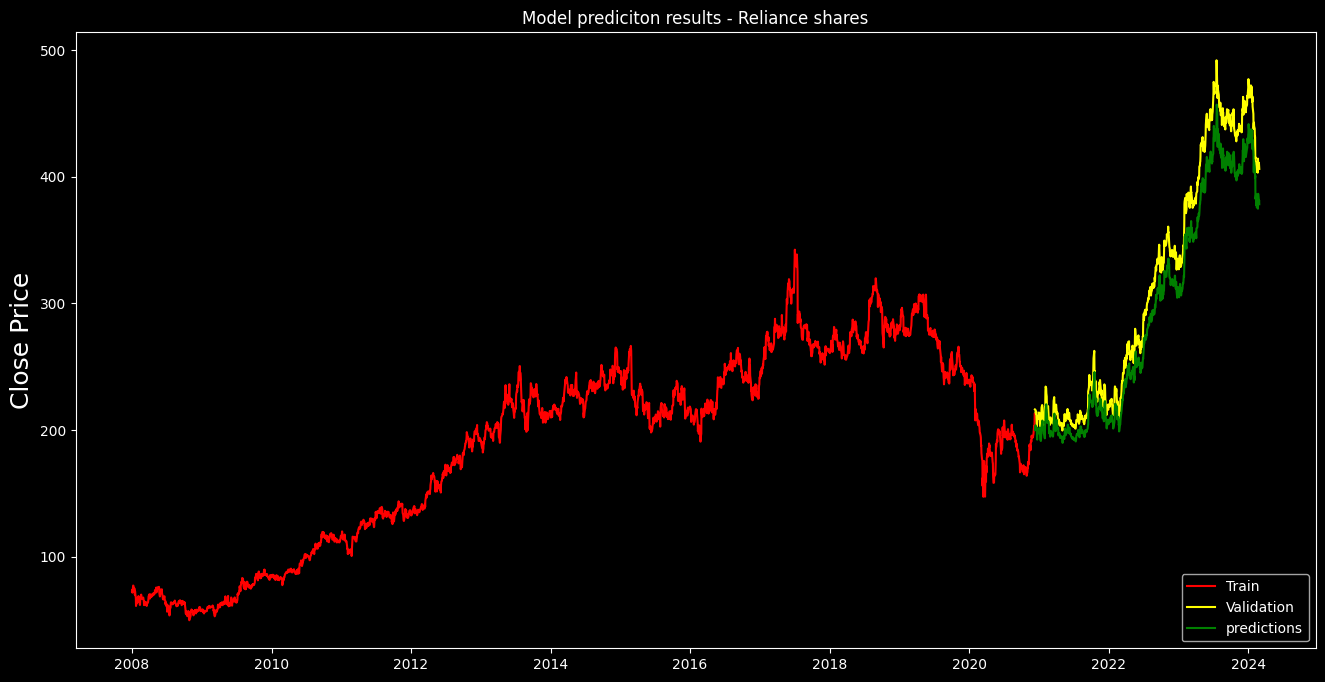

In [31]:
predict_stock_lstm('ITC.NS')